# Projeto Prático Perceptron Rosenblatt

Neste projeto prático, o objetivo é implementar o algoritmo de treinamento mediante Aprendizado Supervisionado do neurônio Perceptron de Rosenblatt aplicado em problemas de classificação.

### Equipe:
1. Afonso Henrique Torres Lucas | ifonso.developer@gmail.com | iFonso - 2215080047

2. Erik Gustavo Lima de Oliveira | erik.exatas10@gmail.com | ErikExatas - 2115080049

3. David Augusto De Oliveira E Silva | david-augusto-silva - 2115080006

4. Lilian Iazzai De Souza Oliveira | lilianiazzai@gmail.com | lilianiazzai - 2215080018

5. Vitor Nascimento Aguiar | Vtaguiar1909 - 2115080055

In [198]:
# identificador do arquivo
id = (7+9+6+8+5)%4
print(id)

3


### 2.1. Parte I – Resolvendo um Problema Linearmente Separável

Nesta parte, todas as equipes devem usar o arquivo dataAll.txt e construir o algoritmo de treinamento do neurônio perceptron para resolver o problema de classificação proposto. Alguns aspectos devem ser considerados:

1. As equipes devem utilizar a função de ativação degrau com θ = 0;
2. O valor da taxa de aprendizado deve ser igual a η = 0,1;
3. O vetor inicial de pesos deve ter seus valores inicializados conforme uma variável aleatória de distribuição uniforme no intervalo, isto é, wi ∼ U(−0,5, + 0,5). O vetor inicial de pesos deve ser impresso no início da execução do algoritmo;
4. O algoritmo deve executar até a convergência, isto é, até que não haja erros para todos os exemplos presentes no conjunto de treinamento;
5. Ao final, deve-se imprimir:
(a) O número total de ajustes no vetor de pesos;
(b) O número de épocas até a convergência;
(c) O gráfico contendo todos os exemplos do conjunto de dados e a reta que separa as classes obtida como resultado do treinamento do neurônio Perceptron. Respeitar o esquema de cores proposto inicialmente e apresentar a solução de maneira clara neste gráfico.

In [200]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as skm
from prettytable import PrettyTable

In [201]:
with open('./data/dataAll.txt', 'rb') as f:
    data = f.read()

In [202]:
type(data)

bytes

Após a leitura do arquivo binário, reconstruímos os dados como array de float64, redimensionamos para (m, 1, 3) e tiramos o extra do meio, ficando no formato (m, 3)

In [203]:
array = np.frombuffer(data, dtype=np.float64) # reconstruindo
m = array.size // 3

dados = array.reshape((m, 1, 3)) # redimensionando

dados = dados.reshape(-1, 3) # retirando o extra do meio

In [204]:
dados

array([[-363.7884,  244.1423,    0.    ],
       [ 328.7572, -256.7658,    1.    ],
       [-164.9827,  613.2164,    0.    ],
       ...,
       [ 872.4311,  669.1192,    1.    ],
       [ 822.6894, -702.6489,    1.    ],
       [-140.147 ,  734.0983,    0.    ]], shape=(1000, 3))

In [205]:
X = dados[:, :2]
y = dados[:, 2]

In [206]:
# parâmetros definidos pela questão
eta = 0.1
theta = 0
max_epocas = 1000  # evita loop infinito em testes

In [207]:
# pesos aleatórios em distribuição uniforme em [-0.5, 0.5]
w = np.random.uniform(-0.5, 0.5, size=3)  # [w0, w1, bias]
print(f"Pesos iniciais: {w}")

Pesos iniciais: [-0.20995741 -0.30322229  0.25879774]


In [208]:
# adicionando coluna de bias (x0 = 1) aos dados
X_bias = np.c_[np.ones(X.shape[0]), X]  # shape = (m, 3)

In [ ]:
ajustes = 0
epocas = 0
convergiu = False

while not convergiu and epocas < max_epocas:
    convergiu = True
    for xi, yi in zip(X_bias, y):
        u = np.dot(w, xi)
        y_pred = 1 if u >= theta else 0
        erro = yi - y_pred
        if erro != 0:
            w += eta * erro * xi
            ajustes += 1
            convergiu = False
    epocas += 1


0


Total de ajustes: 0
Épocas até convergência: 1


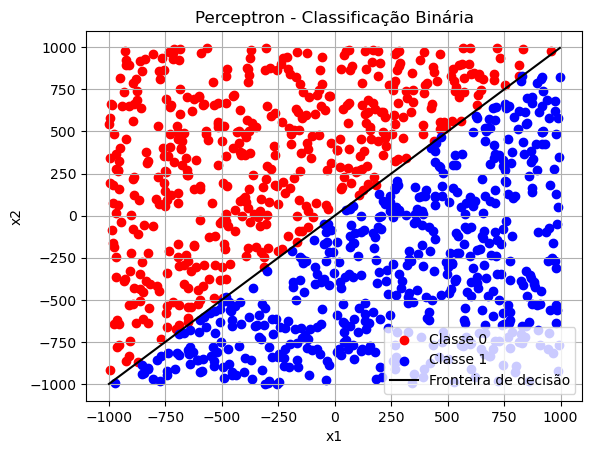

In [213]:
print(f"\nTotal de ajustes: {ajustes}")
print(f"Épocas até convergência: {epocas}")

# separando as classes para o gráfico
classe_0 = X[y == 0]
classe_1 = X[y == 1]

plt.scatter(classe_0[:, 0], classe_0[:, 1], color='red', label='Classe 0')
plt.scatter(classe_1[:, 0], classe_1[:, 1], color='blue', label='Classe 1')

# reta de decisão: w0 + w1*x1 + w2*x2 = 0  => x2 = -(w0 + w1*x1)/w2
x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_vals = -(w[0] + w[1]*x_vals) / w[2]
plt.plot(x_vals, y_vals, color='black', label='Fronteira de decisão')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Perceptron - Classificação Binária')
plt.grid(True)
plt.show()

### 2.2 - Experimentação

Nesta parte, as equipes usarão o seu identificador para trabalhar com um arquivo específico. Usaremos, então, o arquivo ```data3.txt```.

Aproveitando o algoritmo construído na seção 2.1, serão executadas 10 repetições deste para seguintes configurações: $\eta \times I = \{0.4, 0.1, 0.01\} \times \{(-100, +100), (-0.5, +0.5)\}$, em que I é o intervalo utilizado para distribuição uniforme do valor dos pesos. No total, serão feitas 60 execuções: 10 execuções para cada uma das 6 configurações.



In [189]:
etas = (0.4, 0.1, 0.01) # conjunto de taxas de aprendizagem
intervalos = ((-100, 100), (-0.5, 0.5)) # intervalos da distribuição uniforme dos pesos

In [190]:
with open("./data/data3.txt", "rb") as f:
    data3 = f.read()

In [191]:
array3 = np.frombuffer(data3, dtype=np.float64)
m = array3.size // 3

dados3 = array3.reshape((m, 1, 3))
dados3 = dados3.reshape(-1, 3)


In [192]:
X3 = dados3[:, :2]
y3 = dados3[:, 2]

In [193]:
X3_bias = np.c_[np.ones(X3.shape[0]), X3]

In [194]:
X3_bias

array([[ 1.        ,  0.06162809, -0.1242566 ],
       [ 1.        , -0.12576683, -0.20385724],
       [ 1.        ,  0.03625188, -0.12610779],
       ...,
       [ 1.        ,  1.03004673,  1.06580527],
       [ 1.        ,  0.95844465,  1.05425162],
       [ 1.        ,  1.05935906,  0.93900834]], shape=(600, 3))

In [195]:
tabela = PrettyTable(("Taxa de Aprendizado", 
                     "Intervalo de Pesos", 
                     "Quantidade de Ajustes", 
                     "Menor número de épocas para convergência"))

In [218]:
def train_perceptron(X:np.ndarray, y:np.ndarray, w:np.ndarray, eta:float):
    ajustes=0
    epocas=0
    max_epocas=1000
    converge=False

    while not converge and epocas < max_epocas:
        convergiu=True
        for xi, yi in zip(X, y):
            u=np.dot(w, xi)
            y_pred = (1 if u >= theta else 0)
            erro = yi - y_pred
            if erro != 0:
                w += eta * erro * xi
                ajustes += 1
                convergiu = False
        epocas += 1
    
    return ajustes, epocas

In [219]:
for n in etas:
    for i in intervalos:
        for j in range(10):
            ajustes = []
            epocas = []
            w = np.random.uniform(i[0], i[1])

            a, e = train_perceptron(X3_bias, y3, w, n)
            ajustes.append(a)
            epocas.append(e)
        avg = np.average(ajustes)
        std_dev = np.std(ajustes)

        min_epocas = min(epocas)

        tabela.add_row(f"$/eta$ = {n}",
                       f"({i[0]}, {i[1]})",
                       f"{avg:.1f} +- {std_dev:.1f}",
                       f"{min_epocas}")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [221]:
tabela

Taxa de Aprendizado,Intervalo de Pesos,Quantidade de Ajustes,Menor número de épocas para convergência
